In [1]:
import matplotlib.pyplot as plt
import numpy
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

In [2]:
# hyperparams
inp_dim = 28 * 28
#try to use other model params. check overfitting with large models
hidden = 350
out_dim = 60
device_id = -1
device = 'cpu' if device_id == -1 else f'cuda:{device_id}'
n_epochs = 9
batch_size = 128

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5)),
     ])


dataset_train = datasets.MNIST('.', 
                               train=True,            
                               download=True, 
                               transform=transform)
trainloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

dataset_test = datasets.MNIST('.', 
                              train=False,
                              download=True, 
                              transform=transform)
testloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

In [4]:
dataset_test[555]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [5]:
class Encoder(nn.Module):
  #28*28 -> hidden -> hidden_out
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, out_dim)

  def forward(self, x):
    x = self.activ(self.do(self.linear1(x)))

    return self.linear2(x)

class Decoder(nn.Module):
  #hidden_out-> hidden -> 28*28 
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, out_dim)

  def forward(self, x):
    x = self.activ(self.do(self.linear1(x)))

    return self.linear2(x)

class LinearAutoEncoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    self.encoder = Encoder(input_dim, hidden_dim, out_dim)
    self.decoder = Decoder(out_dim, hidden_dim, input_dim)

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [6]:
model = LinearAutoEncoder(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.L1Loss() #TODO try to use MAE


epoch: 0, step: 0, loss: 0.9445211291313171
epoch: 0, step: 200, loss: 0.20153051614761353
epoch: 0, step: 400, loss: 0.1854904741048813


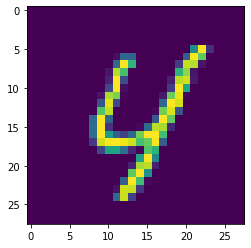

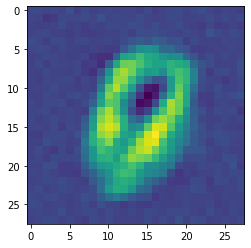

epoch: 1, step: 0, loss: 0.17046011984348297
epoch: 1, step: 200, loss: 0.16135171055793762
epoch: 1, step: 400, loss: 0.14762547612190247


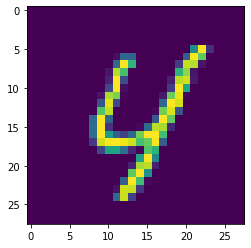

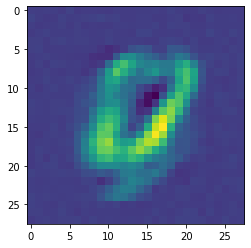

epoch: 2, step: 0, loss: 0.1477086991071701
epoch: 2, step: 200, loss: 0.13987486064434052
epoch: 2, step: 400, loss: 0.14061805605888367


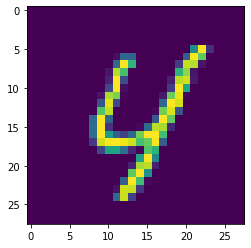

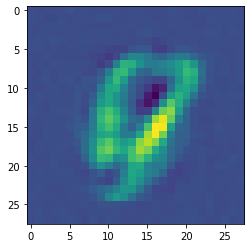

epoch: 3, step: 0, loss: 0.13643138110637665
epoch: 3, step: 200, loss: 0.13361838459968567
epoch: 3, step: 400, loss: 0.13119113445281982


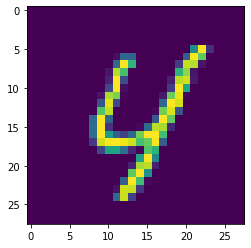

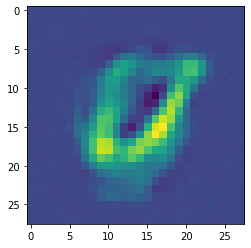

epoch: 4, step: 0, loss: 0.130433589220047
epoch: 4, step: 200, loss: 0.12896323204040527
epoch: 4, step: 400, loss: 0.1266101598739624


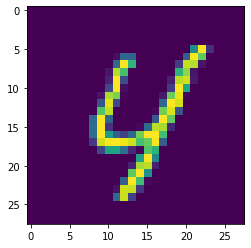

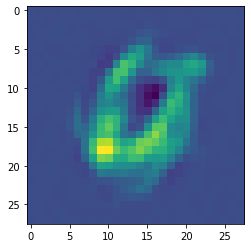

epoch: 5, step: 0, loss: 0.12226874381303787
epoch: 5, step: 200, loss: 0.12838898599147797
epoch: 5, step: 400, loss: 0.12227451801300049


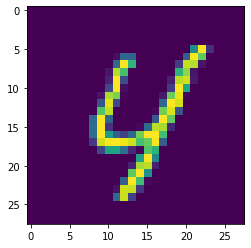

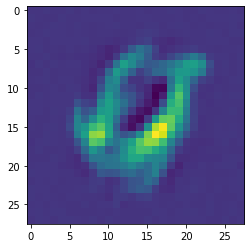

epoch: 6, step: 0, loss: 0.12244706600904465
epoch: 6, step: 200, loss: 0.12711352109909058
epoch: 6, step: 400, loss: 0.12760217487812042


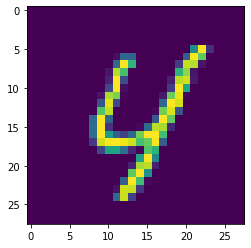

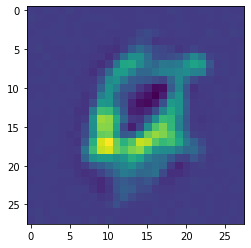

epoch: 7, step: 0, loss: 0.1285012811422348
epoch: 7, step: 200, loss: 0.12147694081068039
epoch: 7, step: 400, loss: 0.12344519793987274


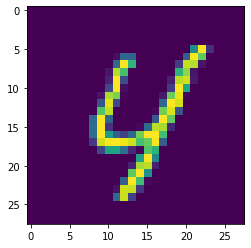

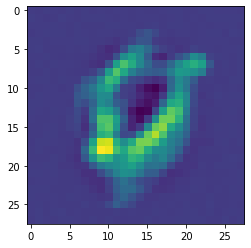

epoch: 8, step: 0, loss: 0.11702487617731094
epoch: 8, step: 200, loss: 0.12201619893312454
epoch: 8, step: 400, loss: 0.11860176920890808


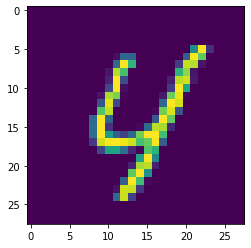

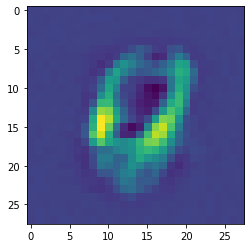

In [7]:
# hidden_out = 40
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        target = inputs.view(inputs.size(0), -1).to(device)
        predict = model(target)
        loss = loss_func(target, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test.data[555].unsqueeze(0).view(1, -1).to(device).float()
    plt.imshow(dataset_test.data[555].detach().numpy())
    plt.show()
    plt.imshow(model(item).view((28, 28)).cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')


In [8]:
input_channels = 1
hidden_channels = 64

In [9]:
class ConvEncoder(nn.Module):
  #28x28 -> hidden -> hidden_out
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2)
    self.do1 = nn.Dropout(0.1)
    self.bnorm1 = nn.BatchNorm2d(num_features=hidden_ch)
    self.pool1 = nn.MaxPool2d((3, 3)) # 9 x 9

    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.do2 = nn.Dropout(0.1)
    self.bnorm2 = nn.BatchNorm2d(num_features=hidden_ch)
    self.pool2 = nn.MaxPool2d((3, 3)) # 3 x 3
    self.conv3 = nn.Conv2d(hidden_ch, 1, kernel_size=3, stride=1, 
                           padding=1)
    self.activ = nn.ReLU()

  def forward(self, x):
    x = self.pool1(self.bnorm1(self.do1(self.activ(self.conv1(x)))))
    x = self.pool2(self.bnorm2(self.do2(self.activ(self.conv2(x)))))

    return self.conv3(x)

class ConvDecoder(nn.Module):
  #hidden_out-> hidden -> 28*28 
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(1, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.do1 = nn.Dropout(0.1)
    self.bnorm1 = nn.BatchNorm2d(num_features=hidden_ch)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=3) # 9 x 9

    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.do2 = nn.Dropout(0.1)
    self.bnorm2 = nn.BatchNorm2d(num_features=hidden_ch)
    self.upsample2 = nn.UpsamplingNearest2d(size=(28, 28)) # 28 x 28
    self.conv3 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2)
    self.activ = nn.ReLU()

  def forward(self, x):
    x = self.upsample1(self.bnorm1(self.do1(self.activ(self.conv1(x)))))
    x = self.upsample2(self.bnorm2(self.do2(self.activ(self.conv2(x)))))

    return self.conv3(x)

class ConvAutoEncoder(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder(input_ch, hidden_ch, )
    self.decoder = ConvDecoder(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [10]:
model = ConvAutoEncoder(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.L1Loss() #TODO try to use MAE


0it [00:00, ?it/s]

epoch: 0, step: 0, loss: 0.9587501883506775
epoch: 0, step: 200, loss: 0.29138094186782837
epoch: 0, step: 400, loss: 0.23858097195625305


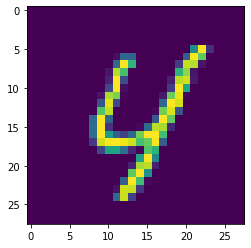

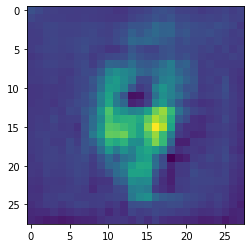

0it [00:00, ?it/s]

epoch: 1, step: 0, loss: 0.22235018014907837
epoch: 1, step: 200, loss: 0.23230063915252686
epoch: 1, step: 400, loss: 0.20378537476062775


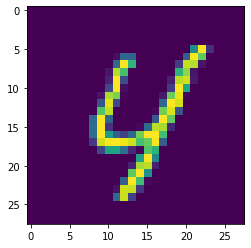

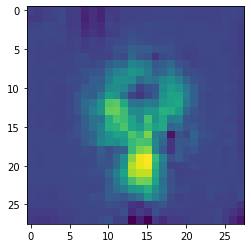

0it [00:00, ?it/s]

epoch: 2, step: 0, loss: 0.19864308834075928
epoch: 2, step: 200, loss: 0.20140208303928375
epoch: 2, step: 400, loss: 0.18538422882556915


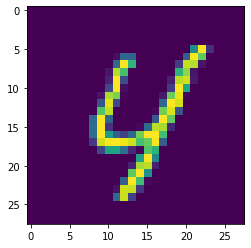

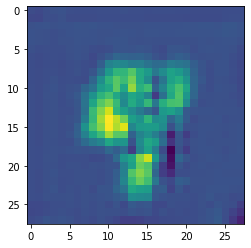

0it [00:00, ?it/s]

epoch: 3, step: 0, loss: 0.1815951019525528
epoch: 3, step: 200, loss: 0.18077394366264343
epoch: 3, step: 400, loss: 0.1747964769601822


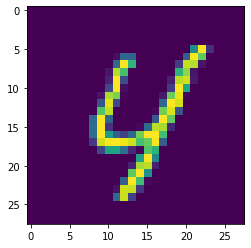

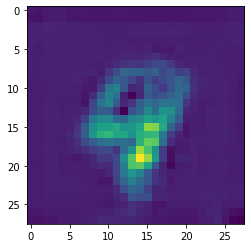

0it [00:00, ?it/s]

epoch: 4, step: 0, loss: 0.18283025920391083
epoch: 4, step: 200, loss: 0.1721590757369995
epoch: 4, step: 400, loss: 0.17803916335105896


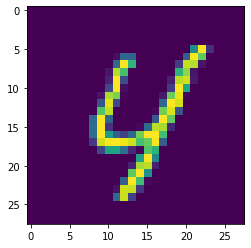

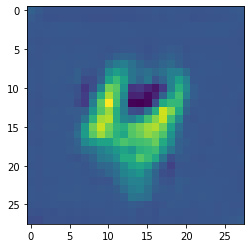

0it [00:00, ?it/s]

epoch: 5, step: 0, loss: 0.1675584316253662
epoch: 5, step: 200, loss: 0.17059586942195892
epoch: 5, step: 400, loss: 0.17296166718006134


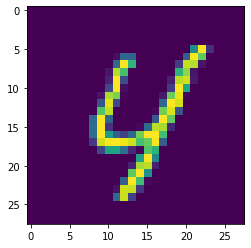

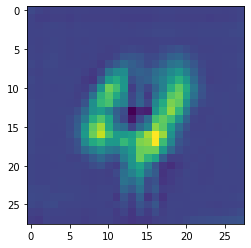

0it [00:00, ?it/s]

epoch: 6, step: 0, loss: 0.17824803292751312
epoch: 6, step: 200, loss: 0.17063382267951965
epoch: 6, step: 400, loss: 0.17365431785583496


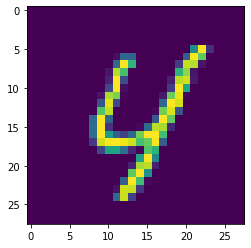

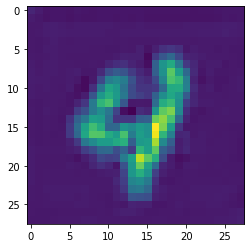

0it [00:00, ?it/s]

epoch: 7, step: 0, loss: 0.1725911945104599
epoch: 7, step: 200, loss: 0.16565628349781036
epoch: 7, step: 400, loss: 0.16955727338790894


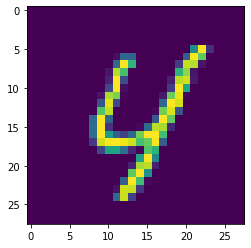

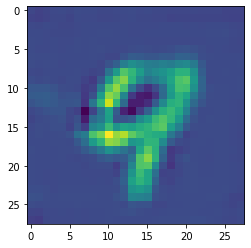

0it [00:00, ?it/s]

epoch: 8, step: 0, loss: 0.1622505933046341
epoch: 8, step: 200, loss: 0.16392363607883453
epoch: 8, step: 400, loss: 0.1743146777153015


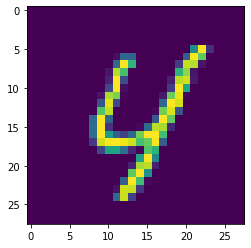

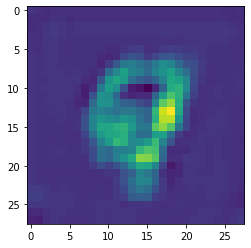

In [11]:
for epoch in range(n_epochs):
    for i, batch in tqdm(enumerate(trainloader)):
        inputs, labels = batch
        optim.zero_grad()

        predict = model(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].unsqueeze(0).to(device).float()
    plt.imshow(dataset_test[555][0].squeeze().detach().numpy())
    plt.show()
    plt.imshow(model(item).squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

epoch: 0, step: 0, loss: 1.0381066799163818
epoch: 0, step: 200, loss: 0.25762853026390076
epoch: 0, step: 400, loss: 0.22736243903636932


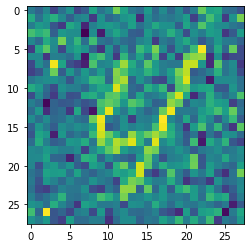

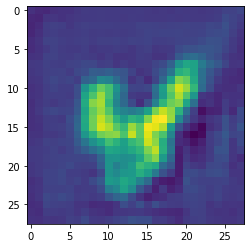

epoch: 1, step: 0, loss: 0.21850885450839996
epoch: 1, step: 200, loss: 0.2099449336528778
epoch: 1, step: 400, loss: 0.20630109310150146


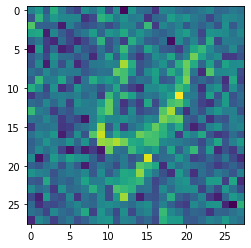

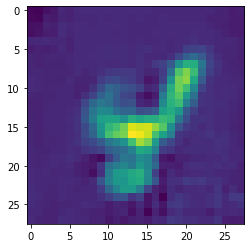

epoch: 2, step: 0, loss: 0.20814208686351776
epoch: 2, step: 200, loss: 0.19265136122703552
epoch: 2, step: 400, loss: 0.18433469533920288


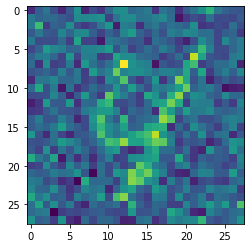

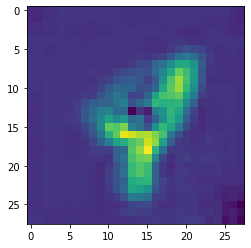

epoch: 3, step: 0, loss: 0.2053328901529312
epoch: 3, step: 200, loss: 0.19558295607566833
epoch: 3, step: 400, loss: 0.1933053880929947


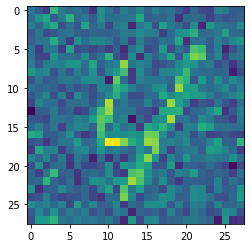

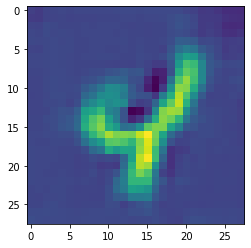

epoch: 4, step: 0, loss: 0.19061653316020966
epoch: 4, step: 200, loss: 0.17732848227024078
epoch: 4, step: 400, loss: 0.17690135538578033


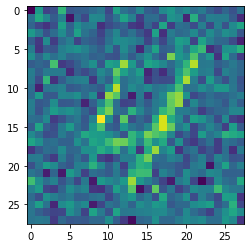

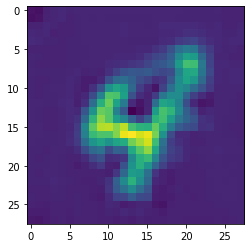

epoch: 5, step: 0, loss: 0.17594987154006958
epoch: 5, step: 200, loss: 0.1741383969783783
epoch: 5, step: 400, loss: 0.1703428328037262


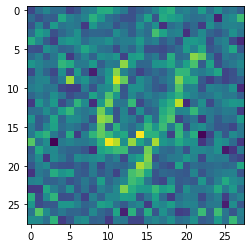

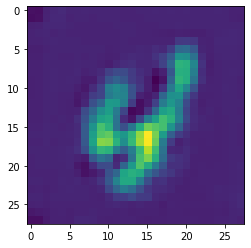

epoch: 6, step: 0, loss: 0.17922662198543549
epoch: 6, step: 200, loss: 0.1657445877790451
epoch: 6, step: 400, loss: 0.17756393551826477


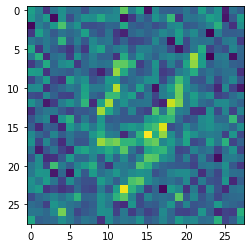

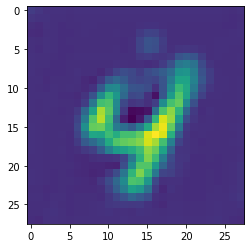

epoch: 7, step: 0, loss: 0.16806785762310028
epoch: 7, step: 200, loss: 0.17013102769851685
epoch: 7, step: 400, loss: 0.16301971673965454


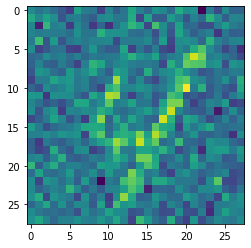

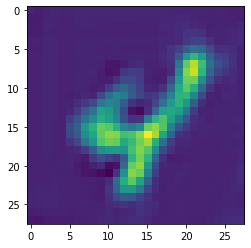

epoch: 8, step: 0, loss: 0.17457595467567444
epoch: 8, step: 200, loss: 0.17044690251350403
epoch: 8, step: 400, loss: 0.16737176477909088


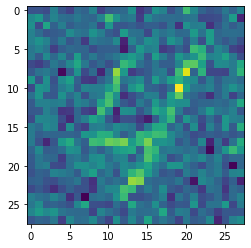

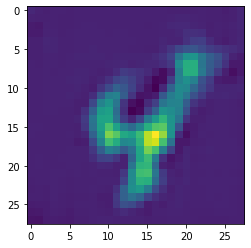

In [12]:
model = ConvAutoEncoder(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.L1Loss() #TODO try to use MAE

for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        inputs = inputs.to(device)
        noise_inputs = inputs + \
        torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.7 
        predict = model(noise_inputs)
        loss = loss_func(inputs, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].unsqueeze(0).to(device).float()
    item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.7
    plt.imshow(item.squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    plt.imshow(model(item).squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

In [13]:
class ConvVAEncoder(nn.Module):
  #28*28 -> hidden -> hidden_out
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) # 28x28
    self.bnorm1 = nn.BatchNorm2d(num_features=hidden_ch)
    self.do1 = nn.Dropout(0.2)
    self.pool1 = nn.MaxPool2d((2, 2)) # 14 x 14
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 14 x 14
    self.bnorm2 = nn.BatchNorm2d(num_features=hidden_ch)
    self.do2 = nn.Dropout(0.3)
    self.pool2 = nn.MaxPool2d((2, 2)) # 7 x 7
    self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 7 x 7
    self.bnorm3 = nn.BatchNorm2d(num_features=hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.pool3 = nn.MaxPool2d((3, 3)) # 2 x 2
    self.conv3_mu = nn.Conv2d(hidden_ch, 1, kernel_size=3, stride=1, 
                           padding=1) # 2 x 2
    self.conv3_sigma = nn.Conv2d(hidden_ch, 1, kernel_size=3, stride=1, 
                           padding=1) # 2 x 2
    self.activ = nn.ReLU()

  def forward(self, x):
    x = self.pool1(self.do1(self.activ(self.bnorm1(self.conv1(x)))))
    x = self.pool2(self.do2(self.activ(self.bnorm2(self.conv2(x)))))
    x = self.pool3(self.do3(self.activ(self.bnorm3(self.conv3(x)))))
    mu = self.conv3_mu(x)
    sigma = torch.exp(self.conv3_sigma(x))

    return mu, sigma

class ConvDecoder(nn.Module):
  #hidden_out-> hidden -> 28*28 
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(1, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 2 x 2
    self.bnorm1 = nn.BatchNorm2d(num_features=hidden_ch)
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(size=(7, 7)) # 7 x 7
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 7 x 7
    self.bnorm2 = nn.BatchNorm2d(num_features=hidden_ch)
    self.do2 = nn.Dropout(0.3)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 14 x 14
    self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) # 14 x 14
    self.bnorm3 = nn.BatchNorm2d(num_features=hidden_ch)
    self.do3 = nn.Dropout(0.2)
    self.upsample3 = nn.UpsamplingNearest2d(scale_factor=2) # 28 x 28
    self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 28 x 28
    self.bnorm4 = nn.BatchNorm2d(num_features=input_ch)
    self.activ = nn.ReLU()
  def forward(self, x):
    x = self.upsample1(self.do1(self.activ(self.bnorm1(self.conv1(x)))))
    x = self.upsample2(self.do2(self.activ(self.bnorm2(self.conv2(x)))))
    x = self.upsample3(self.do3(self.activ(self.bnorm3(self.conv3(x)))))
    x = self.bnorm4(self.conv4(x))


    return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvVAEncoder(input_ch, hidden_ch, )
    self.decoder = ConvDecoder(input_ch, hidden_ch, )

  def forward(self, x):
    mu, sigma = self.encoder(x)
    hidden = sampling(mu, sigma)
    x_ = self.decoder(hidden)

    return x_, mu, sigma

epoch: 0, step: 0, loss: 1.1819602251052856
epoch: 0, step: 200, loss: 0.5735939741134644
epoch: 0, step: 400, loss: 0.4022456407546997


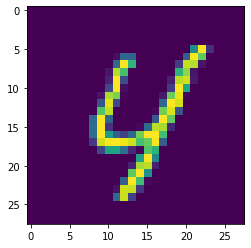

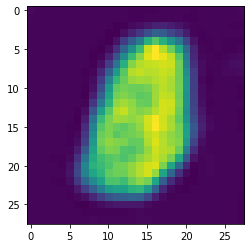

epoch: 1, step: 0, loss: 0.3588375449180603
epoch: 1, step: 200, loss: 0.27617311477661133
epoch: 1, step: 400, loss: 0.22799724340438843


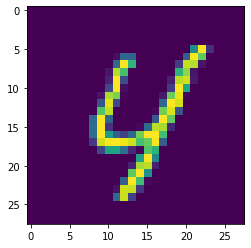

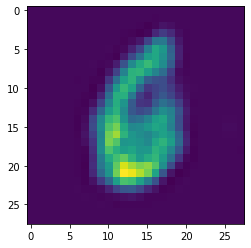

epoch: 2, step: 0, loss: 0.2196006178855896
epoch: 2, step: 200, loss: 0.20459604263305664
epoch: 2, step: 400, loss: 0.20582251250743866


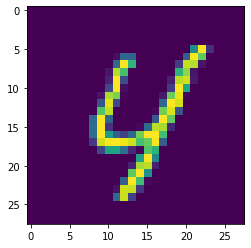

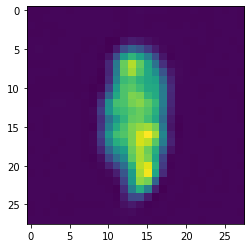

epoch: 3, step: 0, loss: 0.18395838141441345
epoch: 3, step: 200, loss: 0.19355545938014984
epoch: 3, step: 400, loss: 0.19033044576644897


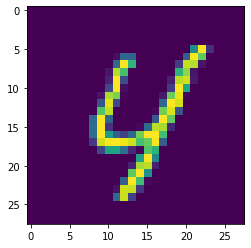

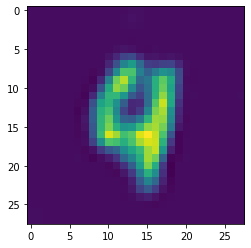

epoch: 4, step: 0, loss: 0.1943807452917099
epoch: 4, step: 200, loss: 0.18988648056983948
epoch: 4, step: 400, loss: 0.18413659930229187


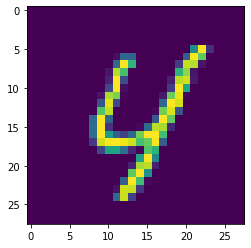

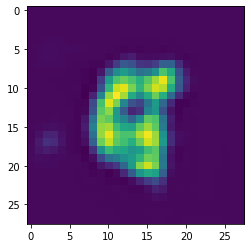

epoch: 5, step: 0, loss: 0.19534680247306824
epoch: 5, step: 200, loss: 0.18494586646556854
epoch: 5, step: 400, loss: 0.1759563684463501


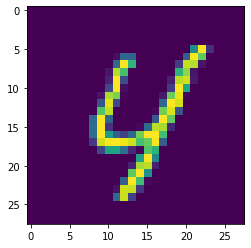

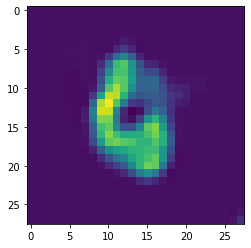

epoch: 6, step: 0, loss: 0.18240869045257568
epoch: 6, step: 200, loss: 0.18099664151668549
epoch: 6, step: 400, loss: 0.17682035267353058


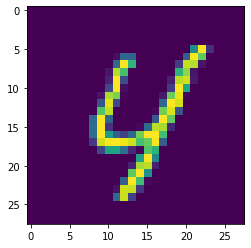

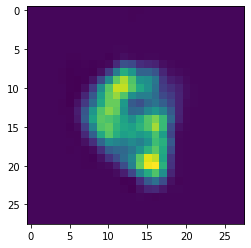

epoch: 7, step: 0, loss: 0.1773495376110077
epoch: 7, step: 200, loss: 0.18848299980163574
epoch: 7, step: 400, loss: 0.17624036967754364


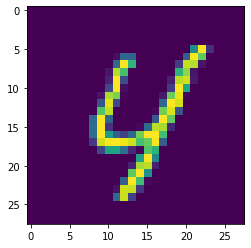

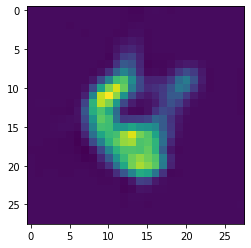

epoch: 8, step: 0, loss: 0.18340791761875153
epoch: 8, step: 200, loss: 0.1874649077653885
epoch: 8, step: 400, loss: 0.18131586909294128


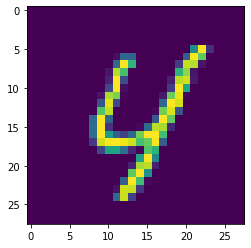

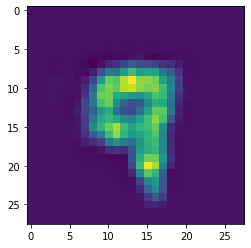

In [14]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model = ConvVAE(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.L1Loss() #TODO try to use MAE

for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()
        inputs = inputs.to(device)
        # noise_inputs = inputs + \
        # torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.7 
        predict, mu, sigma = model(inputs)
        loss = loss_func(inputs, predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    item = dataset_test[555][0].unsqueeze(0).to(device).float()
    # item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.7
    plt.imshow(item.squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    plt.imshow(model(item)[0].squeeze().squeeze().cpu().detach().numpy())
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

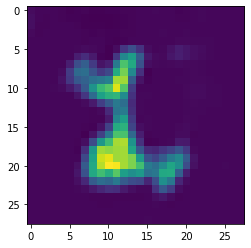

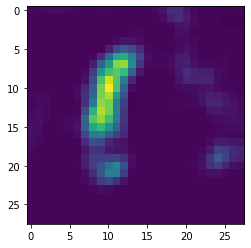

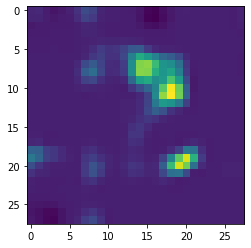

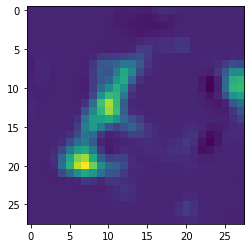

In [15]:
item = dataset_test[555][0].unsqueeze(0).to(device).float()
mu, sigma = model.encoder(item)

for _ in range(4):
    hid = torch.normal(torch.zeros((1,1,3,3)), torch.ones((1,1,3,3))).to(device) 

    plt.imshow(model.decoder(hid).squeeze().squeeze().cpu().detach().numpy())
    plt.show()